<a href="https://colab.research.google.com/github/Sujall10/Data-Science-Projects/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**MY FIRST ML PROJECT**

# **Load Data**

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data Preperation**

## **Data seperation as X & y**

In [6]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [7]:
X = df.drop( 'logS',axis =1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


##**Data Splitting**

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X, y, test_size= 0.2, random_state= 100 )

In [10]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [11]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


# **Model Building**

## **Linear Regression**

### **Training the model**

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a predict**

In [13]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### **Evaluate model performance**




In [18]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [25]:
print("LR MSE (TRAIN): ",lr_train_mse)
print("LR R2 (TRAIN): ",lr_train_r2)
print("LR MSE (TEST): ",lr_test_mse)
print("LR R2 (TEST): ",lr_test_r2)

LR MSE (TRAIN):  1.0075362951093687
LR R2 (TRAIN):  0.7645051774663391
LR MSE (TEST):  1.0206953660861033
LR R2 (TEST):  0.7891616188563282


In [31]:
lr_result = pd.DataFrame(["Linear Regression :", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_result.columns = ["Methods", "Training MSE", "Training R2", "Test MSE", "Test R2"]
lr_result


,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression :,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

### **Applying the model to make a predict**

In [39]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [45]:
rf_result = pd.DataFrame(["Random Forest :", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_result.columns = ["Methods", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_result

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest :,1.028228,0.759669,1.407688,0.709223


# **Model Comparision**

In [50]:
df_models = pd.concat([lr_result,rf_result], axis =0)
df_models.reset_index(drop=True)

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression :,1.007536,0.764505,1.020695,0.789162
1,Random Forest :,1.028228,0.759669,1.407688,0.709223


# **Data Visualization of Prediction Results**

[]

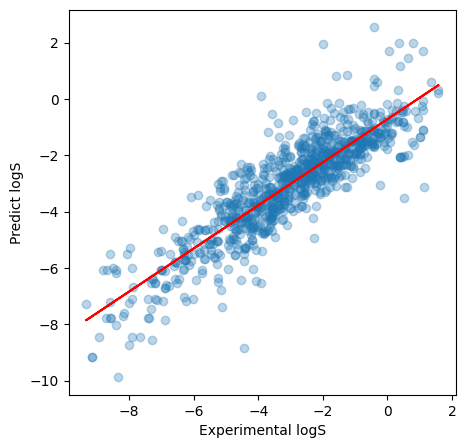

In [66]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,5))
plt.scatter(x= y_train, y= y_lr_train_pred, alpha= 0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train), c="red")
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')

plt.plot()